## Импорт библиотек

In [1]:
#работа с данными
import pandas as pd
import numpy as np 
import random

#визуализация
import matplotlib.pyplot as plt
import seaborn as sns 

## Первичное знакомство с данными

### train.csv

In [3]:
%%time
#Дата сет довольно большой, поэтому кажется лучше взять рандомную выборку в 10 % строк

#заранее лучше указать типа данных столбцов для оптимального хранения данных. 
dtypes = {
    "row_id": "int64",
    "timestamp": "int64",
    "user_id": "int32",
    "content_id": "int16",
    "content_type_id": "boolean",
    "task_container_id": "int16",
    "user_answer": "int8",
    "answered_correctly": "int8",
    "prior_question_elapsed_time": "float32", 
    "prior_question_had_explanation": "boolean"
}

path = '/home/anatoly/Desktop/Data_Science/MIPT/DATA/riiid-test-answer-prediction/'

p = 0.1 
random.seed(11)

train = pd.read_csv(path+'train.csv', 
                    dtype=dtypes,
                    header=0,
                    skiprows=lambda i: i>0 and random.random()>p)
train.head()

CPU times: user 58.1 s, sys: 2.91 s, total: 1min
Wall time: 1min 2s


,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,10,255381,115,152,False,10,2,0,17000.0,False
1,12,302994,115,108,False,12,1,0,23000.0,False
2,15,376162,115,7971,False,15,2,1,22000.0,False
3,21,510583,115,7984,False,21,3,0,20000.0,False
4,23,557677,115,185,False,23,3,0,21000.0,False


In [4]:
train.drop('row_id', axis=1, inplace=True) #row_id не несет полезной информации
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10123715 entries, 0 to 10123714
Data columns (total 9 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   timestamp                       int64  
 1   user_id                         int32  
 2   content_id                      int16  
 3   content_type_id                 boolean
 4   task_container_id               int16  
 5   user_answer                     int8   
 6   answered_correctly              int8   
 7   prior_question_elapsed_time     float32
 8   prior_question_had_explanation  boolean
dtypes: boolean(2), float32(1), int16(2), int32(1), int64(1), int8(2)
memory usage: 251.0 MB


In [5]:
train.isna().sum() # ЕСТЬ ПРОПУСКИ!

timestamp                              0
user_id                                0
content_id                             0
content_type_id                        0
task_container_id                      0
user_answer                            0
answered_correctly                     0
prior_question_elapsed_time       235310
prior_question_had_explanation     39388
dtype: int64

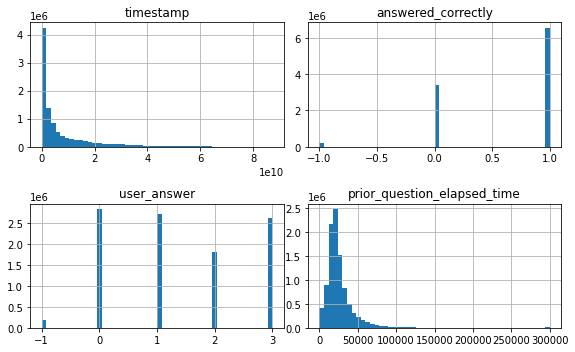

In [6]:
train[['timestamp', 'answered_correctly','user_answer', 
       'prior_question_elapsed_time']].hist(bins=50, figsize=(8,5))
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='prior_question_elapsed_time'>

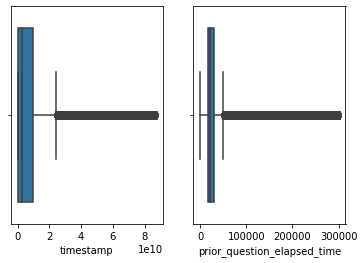

In [7]:
fig, axes = plt.subplots(1,2)
sns.boxplot(data=train, x='timestamp', ax=axes[0],)
sns.boxplot(data=train, x='prior_question_elapsed_time', ax=axes[1])
#есть довольно много отклоняющихся значений. 

In [8]:
train['timestamp'] = train['timestamp'].apply(lambda x: int(x/60/1000))
train['prior_question_elapsed_time'] = train['prior_question_elapsed_time'].apply(lambda x: (x/60/1000))

train.describe().T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
timestamp,10123715.0,NaN,NaN,NaN,128548.136989,193507.045416,0.0,8738.0,44572.0,165474.0,1453221.0
user_id,10123715.0,NaN,NaN,NaN,1076694471.630983,619685670.684876,115.0,540952112.0,1071653750.0,1615726374.0,2147482888.0
content_id,10123715.0,NaN,NaN,NaN,5218.660393,3865.564193,0.0,2063.0,5026.0,7425.0,32736.0
content_type_id,10123715,2,False,9927793,NaN,NaN,NaN,NaN,NaN,NaN,NaN
task_container_id,10123715.0,NaN,NaN,NaN,904.158762,1358.493983,0.0,105.0,382.0,1093.0,9999.0
user_answer,10123715.0,NaN,NaN,NaN,1.376556,1.192968,-1.0,0.0,1.0,3.0,3.0
answered_correctly,10123715.0,NaN,NaN,NaN,0.625233,0.522515,-1.0,0.0,1.0,1.0,1.0
prior_question_elapsed_time,9888405.0,NaN,NaN,NaN,0.423734,0.332539,0.0,0.266667,0.35,0.494433,5.0
prior_question_had_explanation,10084327,2,True,8967375,NaN,NaN,NaN,NaN,NaN,NaN,NaN


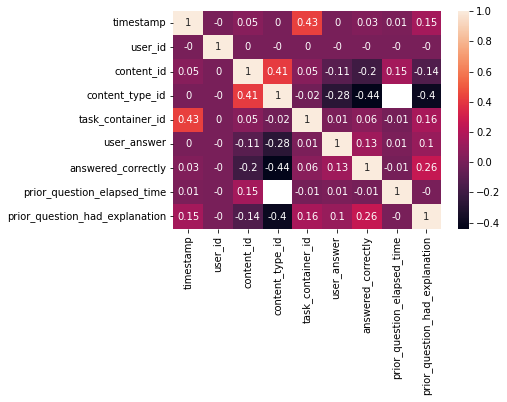

In [9]:
sns.heatmap(train.corr().round(2), annot=True)
plt.xticks(rotation=90) 
plt.show()

Инетересно! Проглядываются какие-то корреляции между целевым признаком answered_coreectly и признакми. Их нужно изучить подробнее -  возможно за этим скрывается какая-то закономерность, хотя не исключено, что наблюдаются какие-то артефакты.

CPU times: user 37.4 s, sys: 3.02 s, total: 40.4 s
Wall time: 35.7 s


<AxesSubplot:xlabel='timestamp', ylabel='Density'>

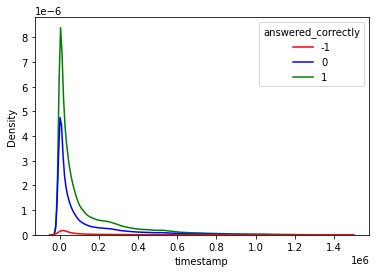

In [10]:
%%time
sns.kdeplot(data=train, x='timestamp', 
            hue="answered_correctly", 
            palette={-1: 'red', 0: 'blue', 1:'green'})

CPU times: user 36.2 s, sys: 3.67 s, total: 39.9 s
Wall time: 36.1 s


<AxesSubplot:xlabel='prior_question_elapsed_time', ylabel='Density'>

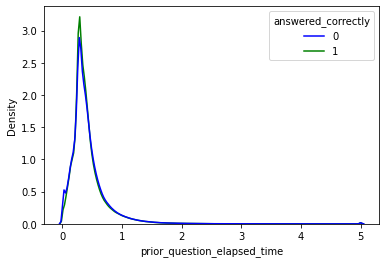

In [11]:
%%time
sns.kdeplot(data=train[train['answered_correctly']!=-1],
            x='prior_question_elapsed_time', 
            hue="answered_correctly",  common_norm=False,
            palette={-1: 'red', 0: 'blue', 1:'green'}, )

Интересно, что распределения для среднего времи ответа на вопросы для верных и не верных не отличается. 

In [12]:
print('Доля событий "взаимодействие пользователя - лекция"',
      round(train['answered_correctly'][train['answered_correctly']==-1].shape[0]/train.shape[0],2))
print('Доля правильных ответов:',
      train['answered_correctly'][train['answered_correctly']!=-1].mean().round(2))

Доля событий "взаимодействие пользователя - лекция" 0.02
Доля правильных ответов: 0.66


Из графика выше можно сделать вывод: события в столбце answered_correctly, которые относятся к просмотру лекции можно отбросить, т.к. они не отражают успеваемость студента. 

In [13]:
group_user = train.groupby('user_id') #сгруппируем данные по пользователям

array([[<AxesSubplot:title={'center':'timestamp'}>]], dtype=object)

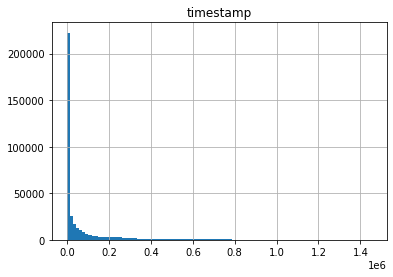

In [14]:
group_user.aggregate({'timestamp': 'max'}).hist(bins = 100) # большинство пользователей покидают платформу довольно бытсро 

Признак timestamp можно рассматривать как "время жизни" пользователя. Из гистограммы выше отчетливо видно, что львиная доля студентов уходят довольно быстро. По всей видимости этот признак имеет ключевое влияние на успеваемость студента.Попробуем разбить данные на групы в зависимости от количества ответов. 

In [15]:
#удалим answered_correctly = -1
train = train[train['answered_correctly']!=-1]
train.user_answer.value_counts() # одновременно ушли значения user_answer=-1!

0    2817481
1    2699153
3    2610314
2    1800845
Name: user_answer, dtype: int64

### questions.csv

In [16]:
questions = pd.read_csv(path+'questions.csv')
questions.head()

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


In [17]:
questions.info() #одие пропуск. Удалим его! 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB


In [18]:
questions.dropna(inplace=True)
questions.describe().T

,count,mean,std,min,25%,50%,75%,max
question_id,13522.0,6760.758024,3903.941125,0.0,3380.25,6760.5,10141.75,13522.0
bundle_id,13522.0,6760.268895,3903.900695,0.0,3378.75,6759.0,10140.00,13522.0
correct_answer,13522.0,1.455258,1.149740,0.0,0.00,1.0,3.00,3.0
part,13522.0,4.264828,1.652547,1.0,3.00,5.0,5.00,7.0


In [19]:
#объединим датасеты questions и train по общему ключу. 
train = pd.merge(train, questions, left_on = 'content_id', right_on = 'question_id', how = 'left')
train.head()

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,question_id,bundle_id,correct_answer,part,tags
0,4,115,152,False,10,2,0,0.283333,False,152,152,1,1,131 5 162 81
1,5,115,108,False,12,1,0,0.383333,False,108,108,3,1,131 104 92
2,6,115,7971,False,15,2,1,0.366667,False,7971,7971,2,1,131 93 92
3,8,115,7984,False,21,3,0,0.333333,False,7984,7984,0,1,131 104 81
4,9,115,185,False,23,3,0,0.350000,False,185,185,0,1,131 111 81


In [20]:
train.drop(['content_id', 'question_id', 'content_type_id', 'tags'], axis=1, inplace=True)
train_df.dropna(inplace = True)
train.info()
#удалили ненужные столбцы

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9927793 entries, 0 to 9927792
Data columns (total 11 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   timestamp                       int64  
 1   user_id                         int32  
 2   task_container_id               int16  
 3   user_answer                     int8   
 4   answered_correctly              int8   
 5   prior_question_elapsed_time     float64
 6   prior_question_had_explanation  boolean
 7   bundle_id                       int64  
 8   correct_answer                  int64  
 9   part                            int64  
 10  tags                            object 
dtypes: boolean(1), float64(1), int16(1), int32(1), int64(4), int8(2), object(1)
memory usage: 624.9+ MB


### lectures.csv

In [21]:
lectures = pd.read_csv(path+'lectures.csv')
lectures.head()

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


In [25]:
lectures['type_of'].value_counts()

concept             222
solving question    186
intention             7
starter               3
Name: type_of, dtype: int64